# Initializing

In [101]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [102]:
change_type_map = {'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5}

train_df = gpd.read_file('train.geojson')
test_df = gpd.read_file('test.geojson')

print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

Train dataset shape: (296146, 45)
Test dataset shape: (120526, 44)


# Data exploration

In [103]:
train_df.head()

,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
0,Sparse Urban,"Dense Forest,Grass Land",Road,93.371775,107.291113,89.827379,29.812040,28.328368,25.324294,125.773062,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,0,"POLYGON ((112.16774 32.02198, 112.16845 32.020..."
1,Sparse Urban,"Dense Forest,Grass Land",Road,96.071674,107.061702,90.755556,24.896240,22.275180,22.080686,133.097679,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Construction Midway,1,"POLYGON ((112.16849 32.02048, 112.16891 32.019..."
2,Sparse Urban,"Dense Forest,Grass Land",Road,101.212148,113.462178,95.670574,24.179684,21.873401,21.285197,120.713490,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Land Cleared,2,"POLYGON ((112.16892 32.01969, 112.16962 32.018..."
3,Rural,"Dense Forest,Grass Land",Road,94.463311,99.995531,84.470046,26.869852,23.767679,19.351983,114.819776,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,3,"POLYGON ((112.16966 32.0181, 112.17033 32.0166..."
4,Dense Urban,"Sparse Forest,Dense Forest,Farms",Demolition,151.883646,191.710197,211.569244,52.465332,59.441844,52.304349,141.514462,...,09-12-2013,Prior Construction,10-09-2016,Prior Construction,22-07-2019,Land Cleared,24-07-2017,Prior Construction,4,"POLYGON ((112.16669 32.01597, 112.16677 32.015..."


In [104]:
print(train_df.info())
print("\nMissing values:\n", train_df.isnull().sum())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 296146 entries, 0 to 296145
Data columns (total 45 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   urban_type            296146 non-null  object  
 1   geography_type        296146 non-null  object  
 2   change_type           296146 non-null  object  
 3   img_red_mean_date1    294192 non-null  float64 
 4   img_green_mean_date1  294192 non-null  float64 
 5   img_blue_mean_date1   294192 non-null  float64 
 6   img_red_std_date1     294192 non-null  float64 
 7   img_green_std_date1   294192 non-null  float64 
 8   img_blue_std_date1    294192 non-null  float64 
 9   img_red_mean_date2    294192 non-null  float64 
 10  img_green_mean_date2  294192 non-null  float64 
 11  img_blue_mean_date2   294192 non-null  float64 
 12  img_red_std_date2     294192 non-null  float64 
 13  img_green_std_date2   294192 non-null  float64 
 14  img_blue_std_date2    294192

In [105]:
train_df.describe()

,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,img_green_mean_date2,img_blue_mean_date2,img_red_std_date2,...,img_red_std_date4,img_green_std_date4,img_blue_std_date4,img_red_mean_date5,img_green_mean_date5,img_blue_mean_date5,img_red_std_date5,img_green_std_date5,img_blue_std_date5,index
count,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,...,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,294192.000000,296146.000000
mean,117.792886,112.486034,108.429724,23.479229,22.177637,21.367732,115.290902,110.476606,106.528886,24.763931,...,30.874508,28.833576,27.584130,126.673630,121.424561,117.101666,32.387261,29.786468,28.311379,148072.500000
std,39.625596,35.847557,35.024903,13.150359,12.859628,12.662411,38.650914,35.226417,34.968077,13.343349,...,15.572063,14.797149,14.233056,41.062537,35.824799,35.121395,15.121846,14.098172,13.500960,85490.130747
min,2.120951,0.459677,1.430288,0.000000,0.000000,0.000000,0.029797,0.031613,0.795573,0.000000,...,0.050273,0.064847,0.233514,0.000000,0.000000,2.212224,0.000000,0.000000,0.000000,0.000000
25%,90.792968,87.875958,84.042084,13.366996,12.334743,11.669164,87.811958,85.375927,81.081426,14.529586,...,18.966936,17.518730,16.594792,98.409849,96.253259,92.208606,21.123749,19.301618,18.262108,74036.250000
50%,115.253031,109.634315,105.716815,21.584569,20.134975,19.142177,114.206431,108.437221,104.143636,23.046544,...,29.778323,27.616634,26.372161,127.596764,121.092378,117.294374,31.869879,28.989122,27.355094,148072.500000
75%,142.277433,134.522744,130.977426,31.670487,29.917736,28.947041,140.317004,132.872328,129.690678,33.147611,...,41.280499,38.503525,36.858707,156.161140,146.990489,142.277807,42.727305,39.211363,37.264827,222108.750000
max,255.000000,255.000000,255.000000,103.517345,104.412772,103.016929,255.000000,255.000000,255.000000,101.571847,...,103.712404,104.138853,100.864793,253.767561,255.000000,255.000000,97.209839,99.519269,97.685647,296145.000000


- The dataset is highly imbalanced.
- The majority class is "Residential", followed by "Commercial".
- "Industrial" and "Mega Projects" are underrepresented.


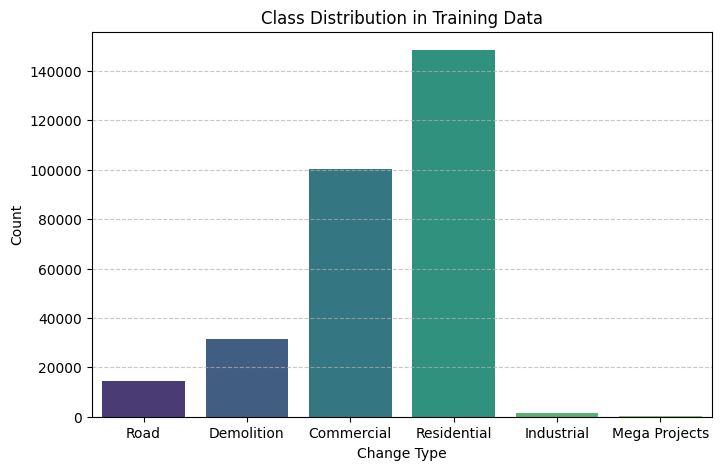

In [106]:
if "change_type" in train_df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=train_df["change_type"], palette="viridis")
    plt.title("Class Distribution in Training Data")
    plt.xlabel("Change Type")
    plt.ylabel("Count")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
else:
    print("Column 'change_type' not found in dataset.")

## Geometry

In [108]:
train_df["geometry"].geom_type.value_counts()

Polygon    296146
Name: count, dtype: int64

In [109]:
train_df["area"] = train_df.geometry.area
train_df["perimeter"] = train_df.geometry.length
train_df["compactness"] = (4 * np.pi * train_df["area"]) / (train_df["perimeter"] ** 2)
train_df["elongation"] = train_df["perimeter"] / np.sqrt(train_df["area"])
train_df["convex_hull"] = train_df.geometry.convex_hull
train_df["convex_hull_area"] = train_df["convex_hull"].area
train_df["convexity"] = train_df["perimeter"] / train_df["convex_hull"].length
train_df["solidity"] = train_df["area"] / train_df["convex_hull_area"]

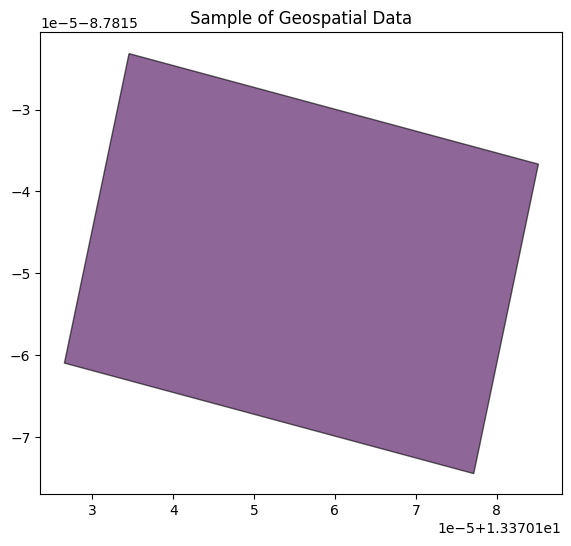

In [110]:
train_df.sample(1).plot(figsize=(10, 6), alpha=0.6, edgecolor="k", cmap="viridis")
plt.title("Sample of Geospatial Data")
plt.show()

In [111]:
train_df["compactness"] = (4 * np.pi * train_df["area"]) / (train_df["perimeter"] ** 2)
train_df["elongation"] = train_df["perimeter"] / np.sqrt(train_df["area"])

train_df[["area", "perimeter", "compactness", "elongation"]].describe()

,area,perimeter,compactness,elongation
count,2.961460e+05,296146.000000,296146.000000,2.961460e+05
mean,5.792799e-07,0.004876,0.646742,inf
std,6.544398e-05,0.091490,0.150301,NaN
min,0.000000e+00,0.000040,0.000000,3.575663e+00
25%,9.224564e-09,0.000409,0.577464,4.068668e+00
50%,2.279025e-08,0.000663,0.696952,4.246230e+00
75%,6.213490e-08,0.001158,0.759111,4.664901e+00
max,2.688329e-02,19.868568,0.982871,inf


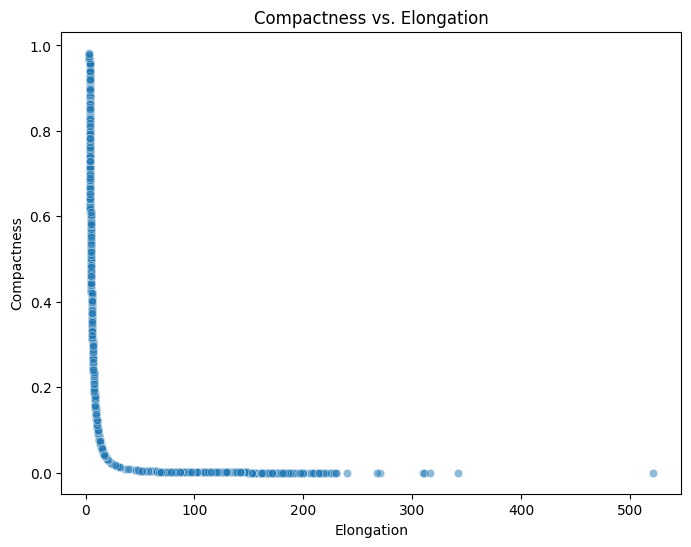

In [112]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df["elongation"], y=train_df["compactness"], alpha=0.5)
plt.title("Compactness vs. Elongation")
plt.xlabel("Elongation")
plt.ylabel("Compactness")
plt.show()

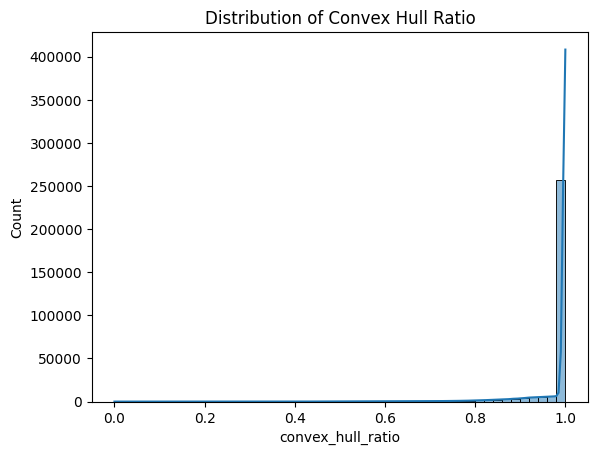

In [114]:
train_df["convex_hull"] = train_df.geometry.convex_hull
train_df["convex_hull_area"] = train_df["convex_hull"].area
train_df["convex_hull_ratio"] = train_df["area"] / train_df["convex_hull_area"]

sns.histplot(train_df["convex_hull_ratio"], bins=50, kde=True)
plt.title("Distribution of Convex Hull Ratio")
plt.show()


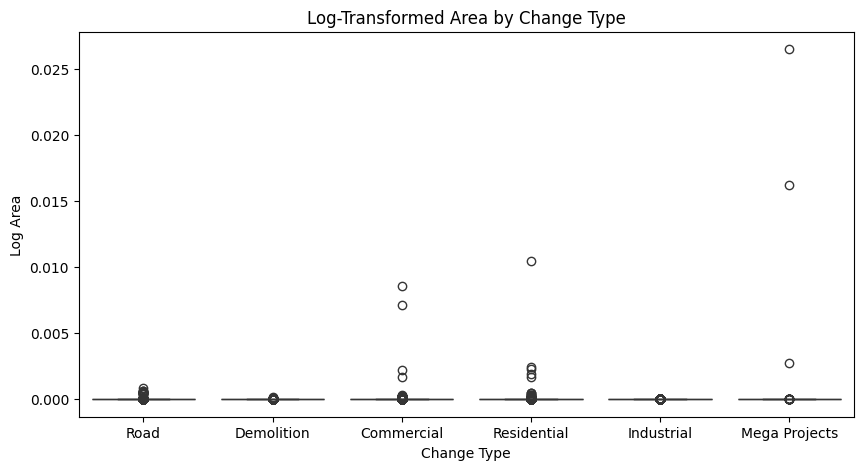

In [116]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_df["change_type"], y=np.log1p(train_df["area"]), palette="viridis")
plt.title("Log-Transformed Area by Change Type")
plt.xlabel("Change Type")
plt.ylabel("Log Area")
plt.show()

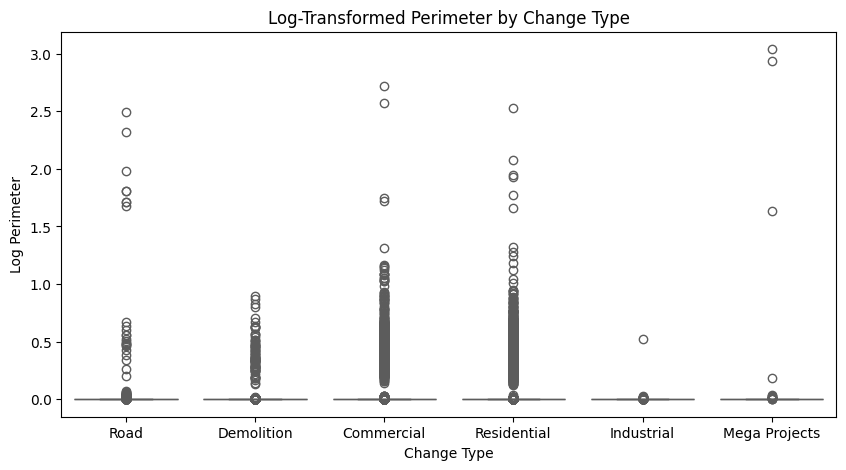

In [117]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_df["change_type"], y=np.log1p(train_df["perimeter"]), palette="coolwarm")
plt.title("Log-Transformed Perimeter by Change Type")
plt.xlabel("Change Type")
plt.ylabel("Log Perimeter")
plt.show()

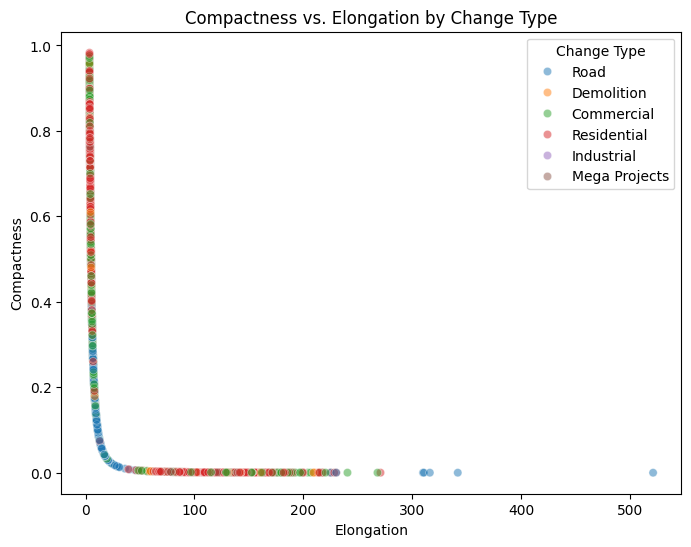

In [118]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_df["elongation"], y=train_df["compactness"], hue=train_df["change_type"], alpha=0.5, palette="tab10")
plt.title("Compactness vs. Elongation by Change Type")
plt.xlabel("Elongation")
plt.ylabel("Compactness")
plt.legend(title="Change Type")
plt.show()


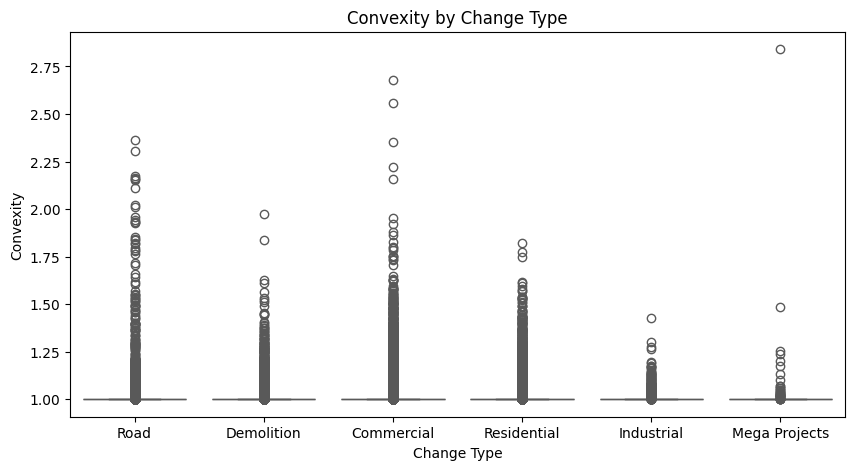

In [119]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_df["change_type"], y=train_df["convexity"], palette="Set2")
plt.title("Convexity by Change Type")
plt.xlabel("Change Type")
plt.ylabel("Convexity")
plt.show()

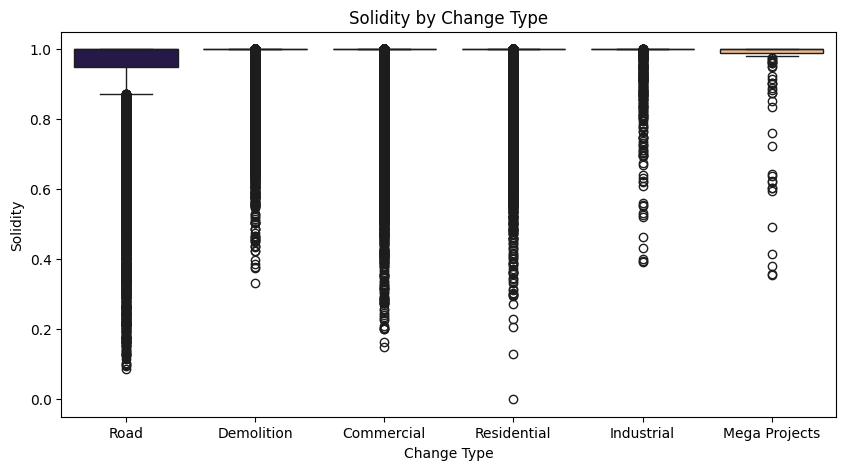

In [120]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_df["change_type"], y=train_df["solidity"], palette="magma")
plt.title("Solidity by Change Type")
plt.xlabel("Change Type")
plt.ylabel("Solidity")
plt.show()


In [132]:
train_df["centroid_x"] = train_df.geometry.centroid.x
train_df["centroid_y"] = train_df.geometry.centroid.y

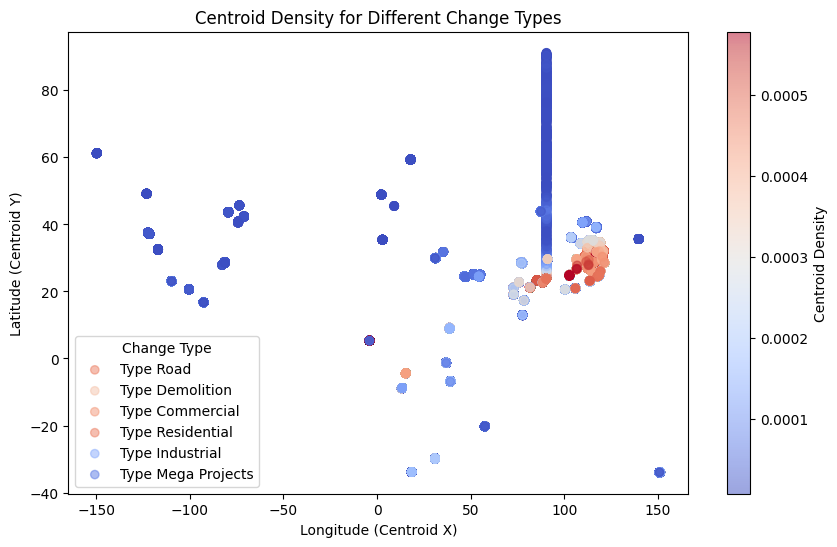

In [95]:
from scipy.stats import gaussian_kde

plt.figure(figsize=(10, 6))
for change_type in train_df["change_type"].unique():
    subset = train_df[train_df["change_type"] == change_type]
    x, y = subset["centroid_x"], subset["centroid_y"]
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)
    
    plt.scatter(subset["centroid_x"], subset["centroid_y"], c=density, cmap="coolwarm", alpha=0.5, label=f"Type {change_type}")

plt.colorbar(label="Centroid Density")
plt.title("Centroid Density for Different Change Types")
plt.xlabel("Longitude (Centroid X)")
plt.ylabel("Latitude (Centroid Y)")
plt.legend(title="Change Type")
plt.show()

# Feature Engineering

## Geometry

In [121]:
train_df["norm_area"] = (train_df["area"] - train_df["area"].min()) / (train_df["area"].max() - train_df["area"].min())
train_df["norm_perimeter"] = (train_df["perimeter"] - train_df["perimeter"].min()) / (train_df["perimeter"].max() - train_df["perimeter"].min())

train_df["shape_index"] = train_df["perimeter"] / np.sqrt(train_df["area"])
train_df["irregularity"] = train_df["perimeter"] ** 2 / (4 * np.pi * train_df["area"])

In [125]:
bounds = train_df.geometry.bounds
train_df["bbox_minx"] = bounds["minx"]
train_df["bbox_miny"] = bounds["miny"]
train_df["bbox_maxx"] = bounds["maxx"]
train_df["bbox_maxy"] = bounds["maxy"]

train_df["bbox_width"] = train_df["bbox_maxx"] - train_df["bbox_minx"]
train_df["bbox_height"] = train_df["bbox_maxy"] - train_df["bbox_miny"]
train_df["bbox_ratio"] = train_df["bbox_width"] / train_df["bbox_height"]
train_df["bbox_area_ratio"] = train_df["area"] / (train_df["bbox_width"] * train_df["bbox_height"])


In [126]:
## Filtering column "mail_type"
# train_x = np.asarray(train_df[['geometry']].area)
train_x = np.asarray(train_df['geometry'].area).reshape(-1, 1)
train_y = train_df['change_type'].apply(lambda x: change_type_map[x])

test_x = np.asarray(test_df[['geometry']].area)
test_x = test_x.reshape(-1, 1)

print (train_x.shape, train_y.shape, test_x.shape)

(296146, 1) (296146,) (120526, 1)


In [135]:
missing_features = [col for col in features if col not in train_df.columns]
print("Missing features:", missing_features)

Missing features: []


In [133]:
if "convexity_log" not in train_df.columns:
    train_df["convexity_log"] = np.log1p(train_df["convexity"])

if "solidity_ratio" not in train_df.columns:
    train_df["solidity_ratio"] = train_df["solidity"] / train_df["convexity"]

if "nearest_neighbor_dist" not in train_df.columns:
    from scipy.spatial import KDTree
    coords = np.array(list(zip(train_df["centroid_x"], train_df["centroid_y"])))
    tree = KDTree(coords)
    train_df["nearest_neighbor_dist"] = tree.query(coords, k=2)[0][:, 1]

if "avg_distance_to_neighbors" not in train_df.columns:
    train_df["avg_distance_to_neighbors"] = tree.query(coords, k=5)[0].mean(axis=1)

if "centroid_density" not in train_df.columns:
    from scipy.stats import gaussian_kde
    x, y = train_df["centroid_x"], train_df["centroid_y"]
    xy = np.vstack([x, y])
    density = gaussian_kde(xy)(xy)
    train_df["centroid_density"] = density

if "elongation_log" not in train_df.columns:
    train_df["elongation_log"] = np.log1p(train_df["elongation"])

if "compactness_inv" not in train_df.columns:
    train_df["compactness_inv"] = 1 - train_df["compactness"]

# Training

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score
import xgboost as xgb

In [139]:
features = ['norm_area', 'norm_perimeter', 'shape_index', 'irregularity', 'bbox_width', 'bbox_height', 'bbox_ratio', 'bbox_area_ratio', 'convexity_log', 'solidity_ratio', 'nearest_neighbor_dist', 'avg_distance_to_neighbors', 'centroid_density', 'elongation_log', 'compactness_inv']
X = train_df[features]
y = train_df["target"]


In [143]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # Convert infinities to NaN
X = X.fillna(X.median())  # Fill missing values with median


In [144]:
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [145]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [146]:
xgb_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=6,
    eval_metric="mlogloss",
    use_label_encoder=False,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=-1, num_class=6, num_parallel_tree=None, ...)

In [149]:
pred_y = xgb_model.predict(X_val)

print(classification_report(y_val, pred_y))
print("F1 Score:", f1_score(y_val, pred_y, average="macro"))


              precision    recall  f1-score   support

           0       0.61      0.25      0.36      6302
           1       0.68      0.62      0.65      2861
           2       0.71      0.82      0.76     29687
           3       0.59      0.57      0.58     20085
           4       0.38      0.02      0.04       265
           5       0.00      0.00      0.00        30

    accuracy                           0.66     59230
   macro avg       0.50      0.38      0.40     59230
weighted avg       0.65      0.66      0.65     59230

F1 Score: 0.3971305678382717


# Tuning and validation

In [154]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_model, X_scaled, y, cv=5, scoring="f1_macro")
print("Cross-Validation F1 Scores:", scores)
print("Mean CV F1 Score:", np.mean(scores))


Cross-Validation F1 Scores: [0.35744583 0.36019361 0.30093251 0.32650138 0.3154414 ]
Mean CV F1 Score: 0.33210294527307166


# Submission

In [153]:
## Save results to submission file
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"submission_{timestamp}.csv"

pred_df = pd.DataFrame(pred_y, columns=['change_type'])
pred_df.to_csv(filename, index=True, index_label='Id')